<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Lesson18_Clustering/How_HDBSCAN_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDBSCAN

* https://towardsdatascience.com/a-gentle-introduction-to-hdbscan-and-density-based-clustering-5fd79329c1e8

* https://pberba.github.io/stats/2020/01/17/hdbscan/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

Сгенерируем данные

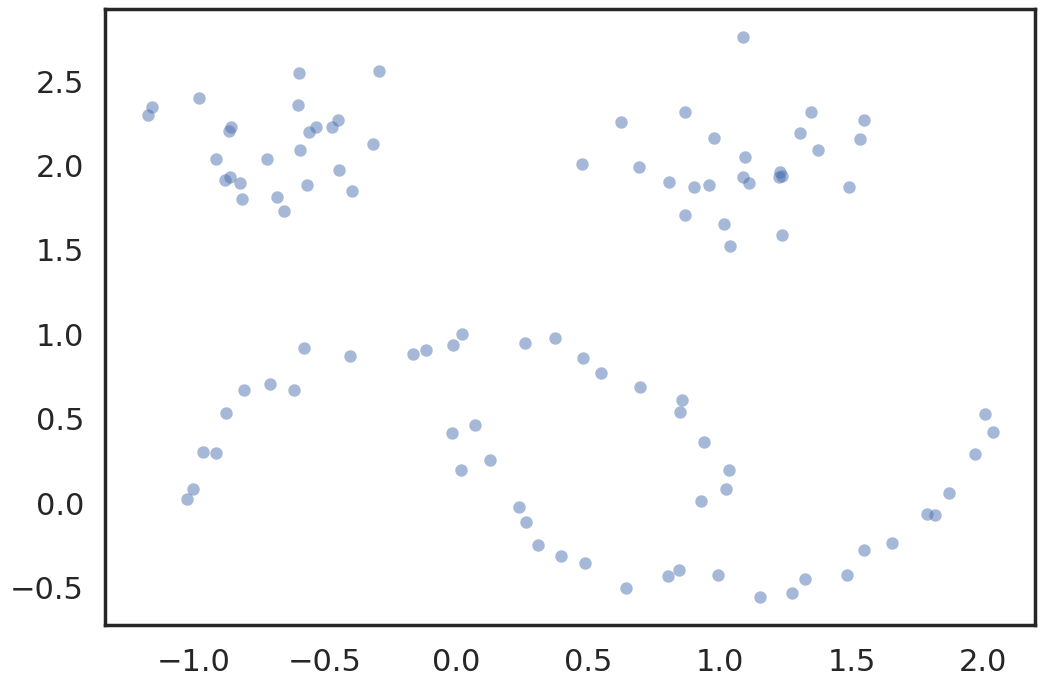

In [2]:
plt.figure(figsize=(12,8))

moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

Установим библиотеку

In [3]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 42.5 MB/s eta 0:00:00


In [4]:
import hdbscan

In [5]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN(gen_min_span_tree=True)

Алгоритм вкратце

1. Аппроксимируем распределение данных с помощью расстояния до k-го соседа
2. Строим минимальное остовное дерево
3. Строим иерархию кластеров
4. Схлопываем кластеры по параметру min_cluster_size
5. Извлекаем итоговые кластеры

Аппроксимируем плотность распределения данных расстоянием до k-го соседа.

Затем строим минимальное остовное дерево.

<Axes: >

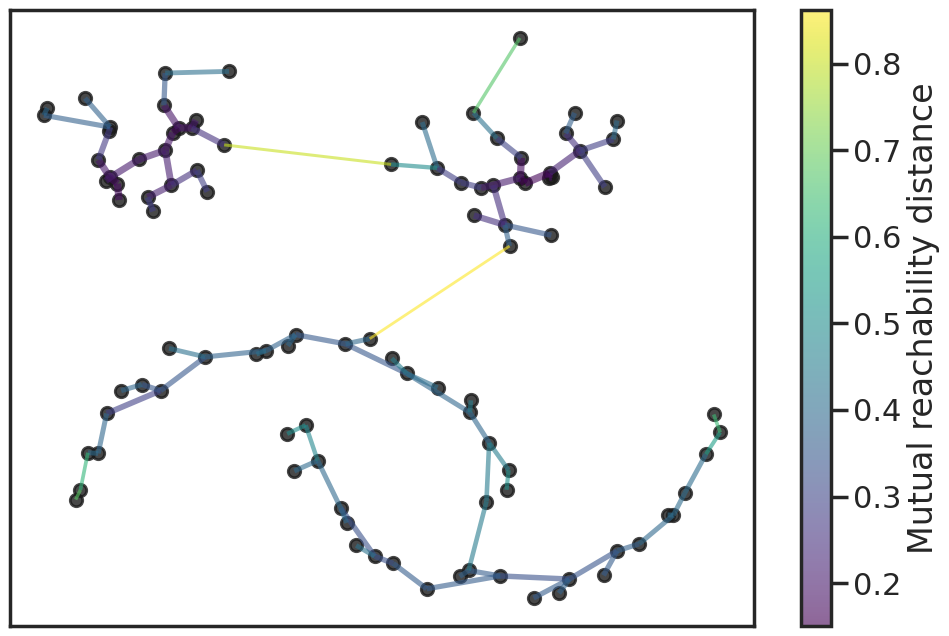

In [6]:
plt.figure(figsize=(12,8))

clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

## Иерархия кластеров

<Axes: ylabel='distance'>

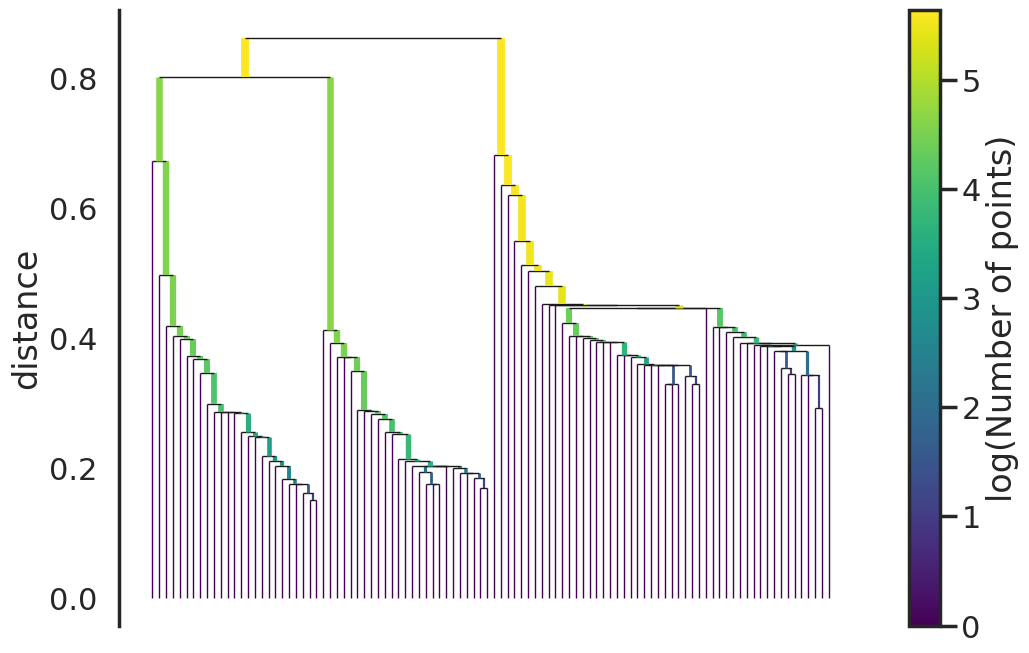

In [7]:
plt.figure(figsize=(12,8))

clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

DBSCAN выберет кластеры по фиксированному порогу distance. HDBSCAN идет чуть дальше.

## Схлопываем кластеры

<Axes: ylabel='$\\lambda$ value'>

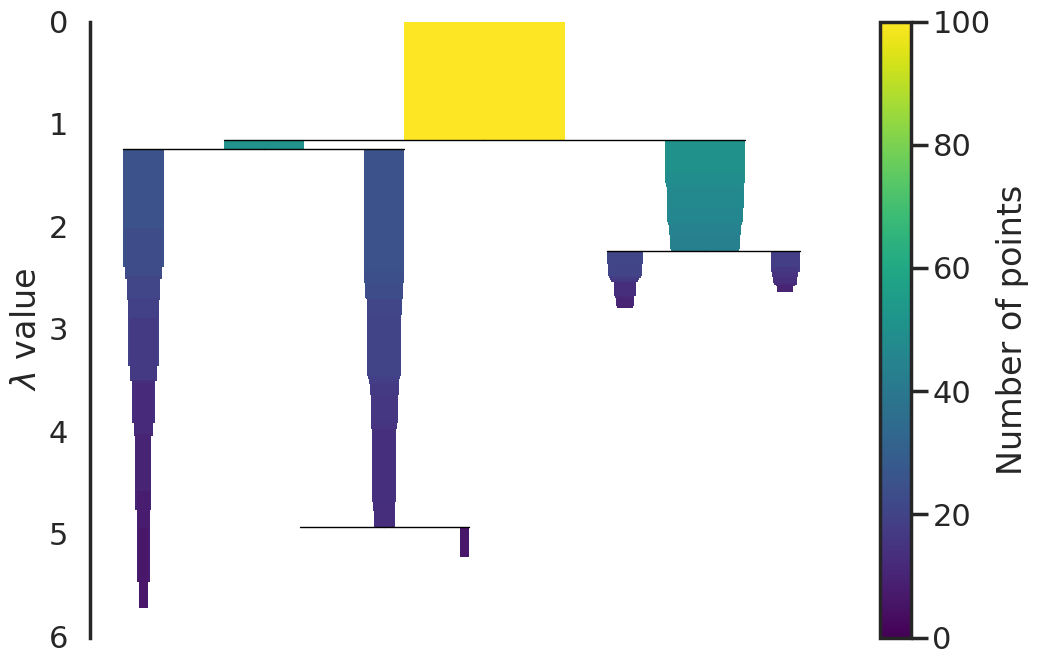

In [8]:
plt.figure(figsize=(12,8))

clusterer.condensed_tree_.plot()

## Извлекаем итоговые кластеры

<Axes: ylabel='$\\lambda$ value'>

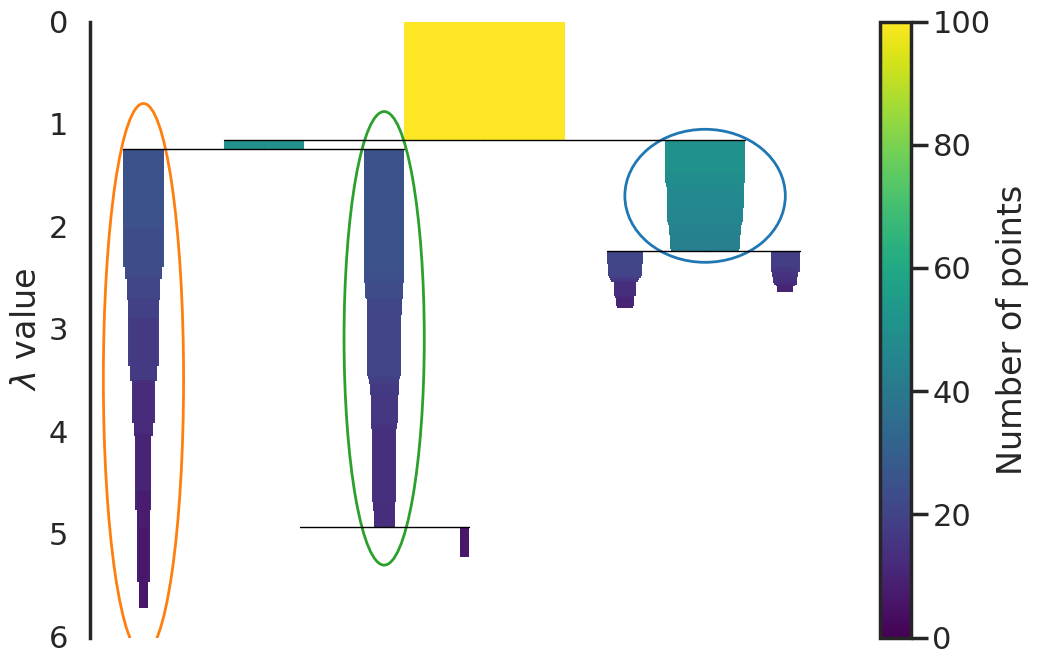

In [9]:
plt.figure(figsize=(12,8))

clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

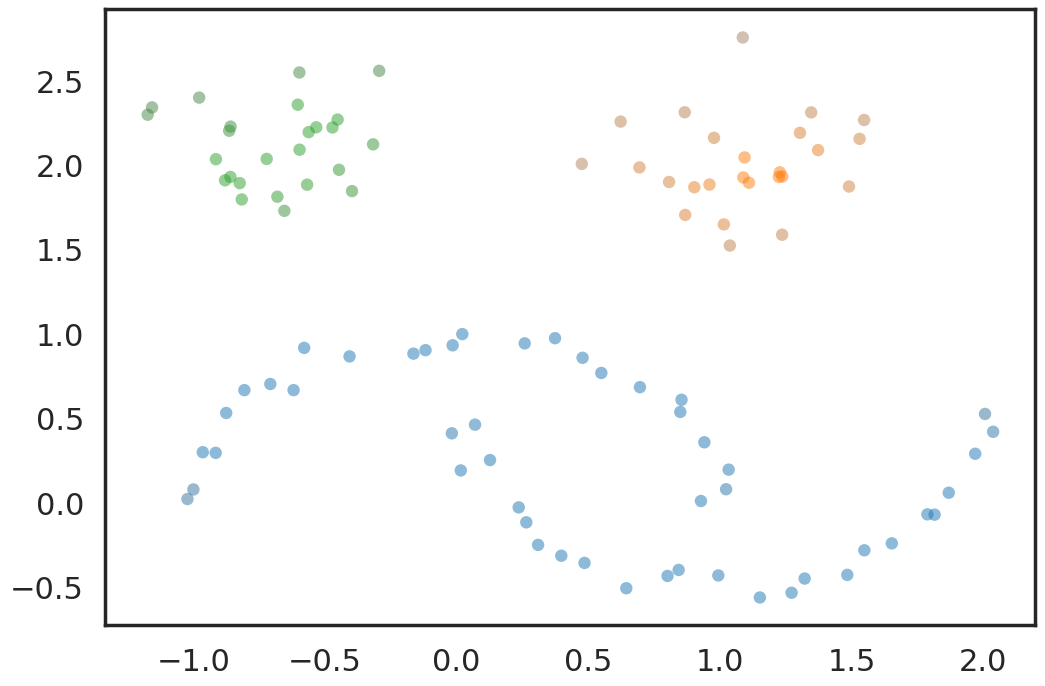

In [10]:
plt.figure(figsize=(12,8))

palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

# Сравнение с DBSCAN

In [11]:
test_data = np.load('clusterable_data.npy')

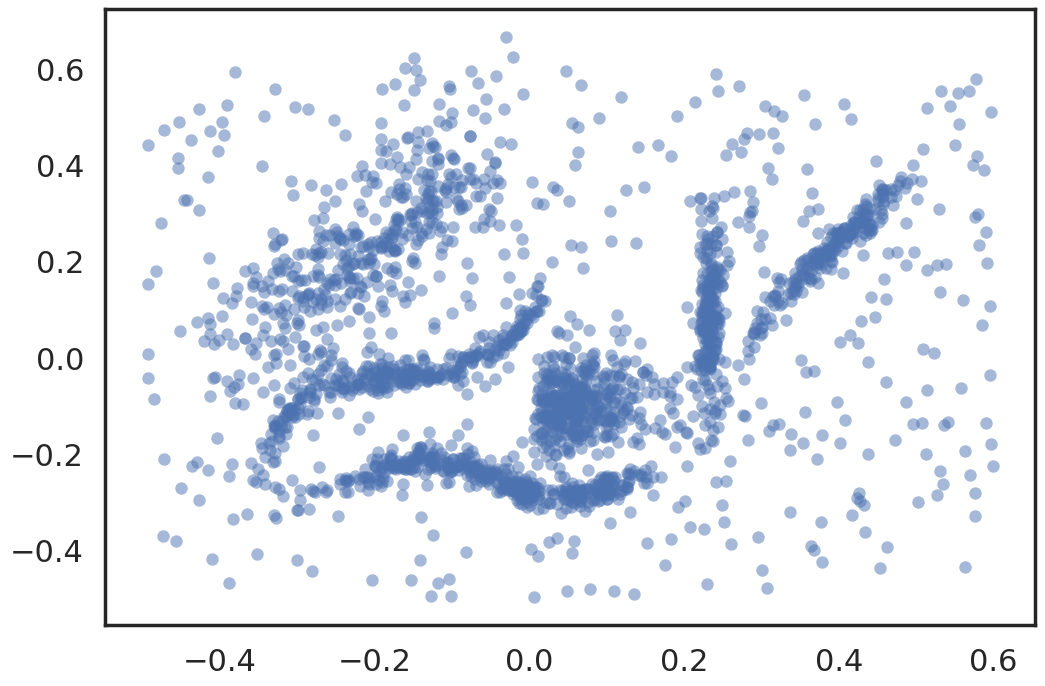

In [12]:
plt.figure(figsize=(12,8))

plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [13]:
from sklearn.cluster import DBSCAN

db_clusterer = DBSCAN(eps = 0.025)
db_clusterer.fit(test_data)

DBSCAN(eps=0.025)

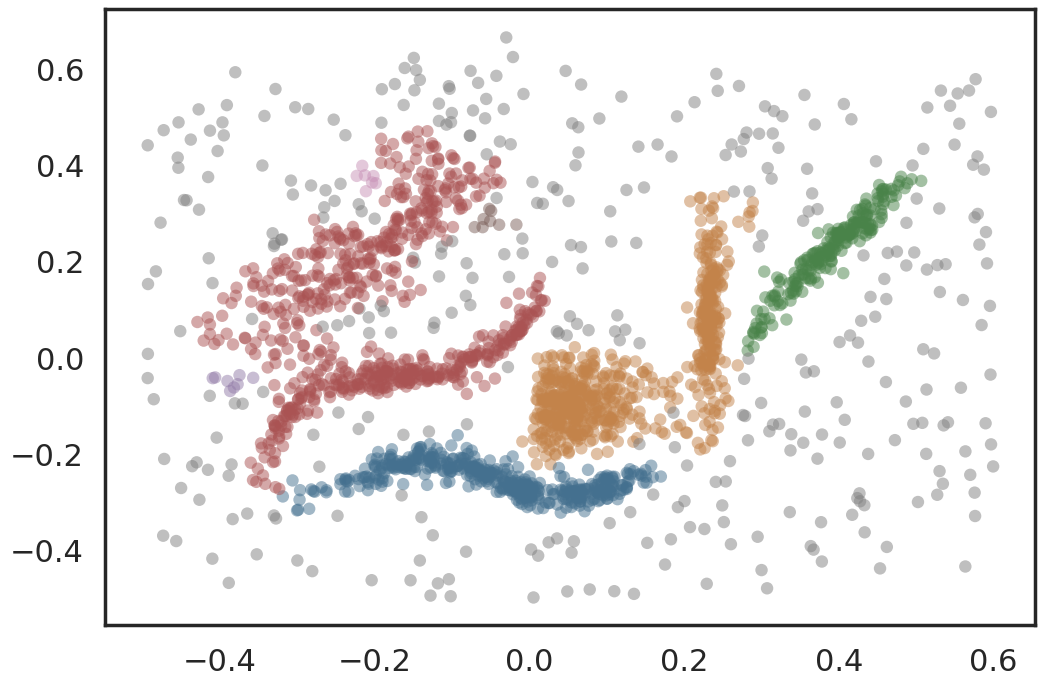

In [14]:
plt.figure(figsize=(12,8))

palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], 0.5)
                  if col >= 0 else (0.5, 0.5, 0.5) for col in
                  db_clusterer.labels_]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

In [15]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
clusterer.fit(test_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN(gen_min_span_tree=True, min_cluster_size=15)

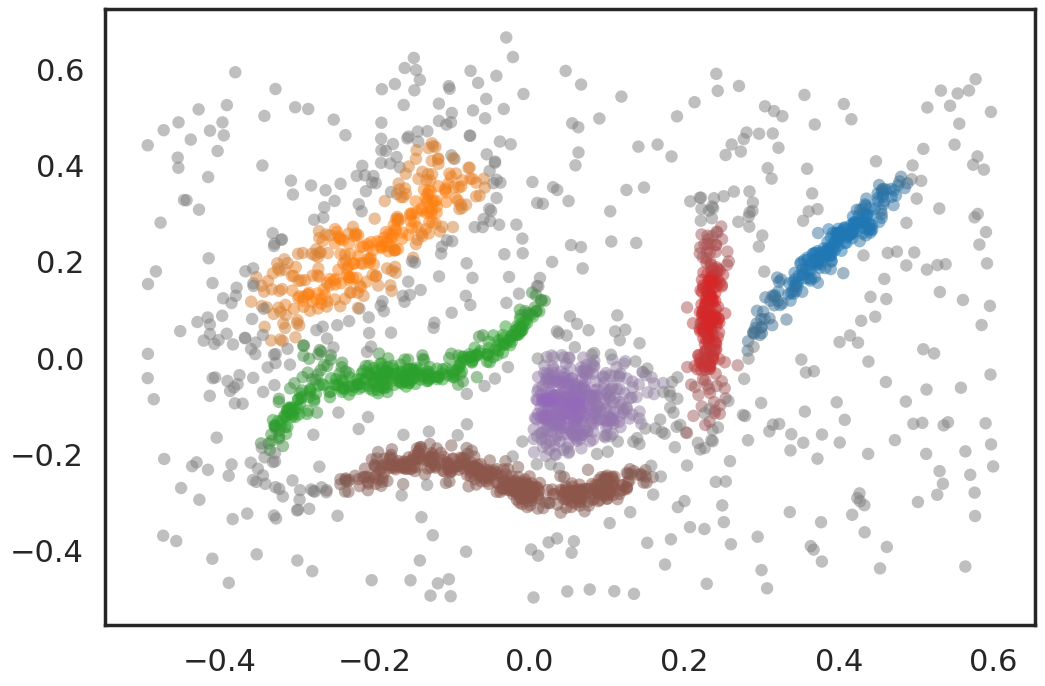

In [16]:
plt.figure(figsize=(12,8))

palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)